In [1]:
import os
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np

rootdir = './test/'           

# Auxiliar functions

In [23]:
def checkJson(json, name=None, initial_lr=None, dropout=None, l2_reg=None, batch_norm=None, data_aug=None):
    if name is not None and json["name_model"]!=name:
        return False
    if initial_lr is not None and json["initial_lr"]!=initial_lr:
        return False
    if dropout is not None and json["dropout"]!=dropout:
        return False
    if l2_reg is not None and json["l2_reg"]!=name:
        return False
    if batch_norm is not None and json["batch_norm"]!=name:
        return False
    if data_aug is not None and json["data_aug"]!=data_aug:
        return False
    return True
    
def confidenceInterval(accuracy, n_test):
    if accuracy==-100:
        return -1
    return 1.96*np.sqrt(accuracy*(100-accuracy)/n_test)

def getBestValAcc(data):
    try:
        return np.amax(np.array(list(data["train_result"]["val_accuracy"].values())))
    except:
        try: 
            return np.amax(np.array(list(data["train_result_augmentation"]["val_accuracy"].values())))
        except:
            return -1       

# MLP graphs

## No regularization

In [13]:
header = "Learning Rate & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"

                
print(header[0:-1])
print(row2[0:-1])
print(row4[0:-1])
print(row8[0:-1])

Learning Rate & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ &
2 Hidden Layers & $45.13\pm0.98$ &$48.54\pm0.98$ &$52.81\pm0.98$ &$54.83\pm0.98$ 
4 Hidden Layers & $46.78\pm0.98$ &$50.92\pm0.98$ &$54.22\pm0.98$ &$56.25\pm0.97$ 
8 Hidden Layers & $47.67\pm0.98$ &$52.57\pm0.98$ &$55.86\pm0.97$ &$56.45\pm0.97$ 


## Regularization

In [24]:
datas = [[None for _ in range(3)] for _ in range(10)]

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            
            print(dir, data["parameters"]["name_model"])
            #if "09_" in dir:
            #    continue
            
            i,j = -1,-1
            if "MLP" in data["parameters"]["name_model"]: 
                if "2" in data["parameters"]["name_model"]:
                    i = 0
                elif "4" in data["parameters"]["name_model"]:
                    i = 1
                elif "8" in data["parameters"]["name_model"]:
                    i = 2

            if data["parameters"]["batch_norm"] and data["parameters"]["data_aug"]>0:
                j = 9
            elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]>0:
                if data["parameters"]["l2_reg"]==0.001:
                    j = 0
                elif data["parameters"]["l2_reg"]==0.002:
                    j = 1
                elif data["parameters"]["l2_reg"]==0.005:
                    j = 2
                elif data["parameters"]["l2_reg"]==0.010:
                    j = 3
            elif data["parameters"]["dropout"]>0:
                if data["parameters"]["dropout"]==0.10:
                    j = 4
                elif data["parameters"]["dropout"]==0.25:
                    j = 5
                elif data["parameters"]["dropout"]==0.50:
                    j = 6
            elif data["parameters"]["batch_norm"]:
                j = 7
            elif data["parameters"]["data_aug"]:
                j = 8
                           
            #print(dir, i, j)    
            if i!=-1 and j!=-1:
                acc = '{:.2f}'.format(getBestValAcc(data)*100)
                ci = '{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))
            
                datas[j][i]={"acc":acc, "ci":ci}
    
for row in datas:
    r = ""
    for col in row:
        #print(row,col)
        if col is not None:
            r += "$"+col["acc"]+"\pm"+col["ci"]+ "$ &"
    print(r[0:-1]+ "\\\\")
                


08_12_27_09 MLP-2layers
08_12_34_49 MLP-2layers
08_12_41_05 MLP-2layers
08_12_45_06 MLP-2layers
08_12_58_58 MLP-4layers
08_13_04_02 MLP-4layers
08_13_09_28 MLP-4layers
08_13_20_20 MLP-4layers
08_13_25_30 MLP-8layers
08_13_31_46 MLP-8layers
08_13_42_59 MLP-8layers
08_14_02_50 MLP-8layers
08_15_55_56 MLP-2layers-reg
08_16_06_42 MLP-2layers-reg
08_16_47_29 MLP-2layers-reg
08_17_16_52 MLP-2layers-reg
08_17_21_23 MLP-4layers-reg
08_17_26_08 MLP-4layers-reg
08_17_30_36 MLP-4layers-reg
08_17_36_32 MLP-4layers-reg
08_18_11_19 MLP-8layers-reg
08_18_19_10 MLP-8layers-reg
08_18_26_42 MLP-8layers-reg
08_18_34_11 MLP-8layers-reg
08_18_52_48 MLP-2layers-dropout
08_19_04_21 MLP-2layers-dropout
08_19_09_26 MLP-2layers-dropout
08_19_22_28 MLP-4layers-dropout
08_19_29_19 MLP-4layers-dropout
08_19_34_16 MLP-4layers-dropout
08_19_38_48 MLP-8layers-dropout
08_19_45_16 MLP-8layers-dropout
08_19_54_06 MLP-8layers-dropout
08_20_01_08 MLP-2layers-BN
08_20_11_38 MLP-4layers-BN
08_20_15_16 MLP-8layers-BN
08_20_2

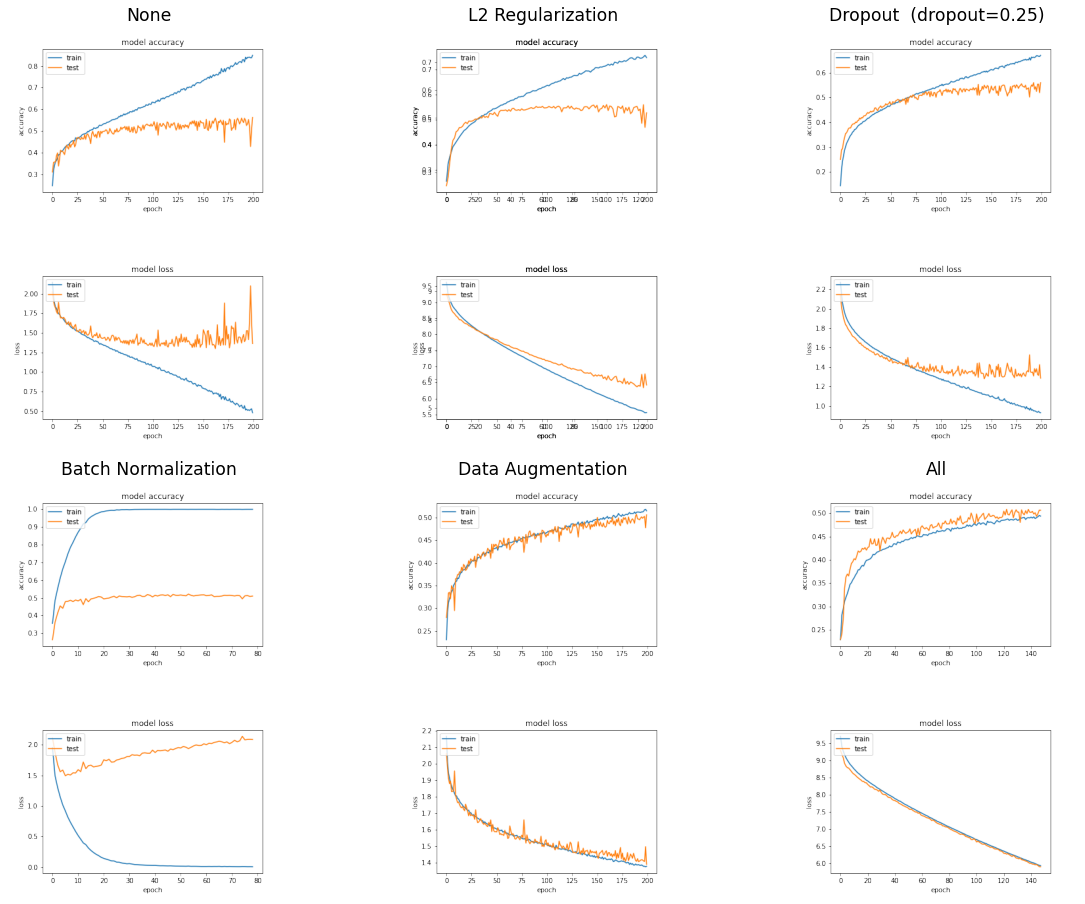

In [30]:
fig, axs = plt.subplots(4,3,figsize=(20,16))
for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if "4" in data["parameters"]["name_model"]:
                
                if data["parameters"]["batch_norm"] and data["parameters"]["data_aug"]>0:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,2].set_title("All", fontsize="xx-large")
                    axs[2,2].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,2].imshow(img)
                elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]==0.001:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,1].imshow(img)
                    axs[0,1].set_title("L2 Regularization", fontsize="xx-large")
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,1].imshow(img)
                elif data["parameters"]["dropout"]==0.25:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,2].set_title("Dropout  (dropout=0.25)", fontsize="xx-large")
                    axs[0,2].imshow(img)
                    
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,2].imshow(img)
        
                elif data["parameters"]["batch_norm"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,0].set_title("Batch Normalization", fontsize="xx-large")
                    axs[2,0].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,0].imshow(img)
                elif data["parameters"]["data_aug"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,1].set_title("Data Augmentation", fontsize="xx-large")
                    axs[2,1].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,1].imshow(img)
                elif data["parameters"]["name_model"]=="MLP-4layers" and data["parameters"]["initial_lr"]==0.01:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,0].set_title("None", fontsize="xx-large")
                    axs[0,0].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,0].imshow(img)